In [1]:
import numpy as np
import pandas as pd


In [2]:
# Reading dataset
df = pd.read_csv('Dataset.csv')
df.head()

,Patient_ID,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,509d24a1-fadc-476c-8259-9cada7215121,21.0,Female,Urgent,25.0,Oncology,4,Private,Surgery,35544
1,57ea25f3-6316-48fc-9609-b02865b31cdb,72.0,Female,Emergency,22.0,Neurological,3,Private,Surgery,30294
2,901fa4cd-cf86-4dce-89b6-f5e8aaeffd6e,42.0,Male,Emergency,21.0,Respiratory,0,Private,Diagnostic,31493
3,8466df72-c9da-4ac1-a6cf-755244837bb4,51.0,Male,Elective,6.0,Cardiac,4,NaN,Diagnostic,19227
4,8f3f108f-5351-41e2-a295-e0058118b212,66.0,Male,Emergency,NaN,Neurological,3,Government,Rehabilitation,25180


In [3]:
# See the no. of rows and columns
df.shape

(966, 10)

In [4]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Patient_ID', 'Age', 'Gender', 'Admission_Type', 'Length_of_Stay', 'Disease_Type', 'Previous_Hospitalizations', 'Insurance_Type', 'Procedure_Type', 'Billing_Amount']


In [5]:
# Display data type of each feature
df.dtypes

Patient_ID                    object
Age                          float64
Gender                        object
Admission_Type                object
Length_of_Stay               float64
Disease_Type                  object
Previous_Hospitalizations      int64
Insurance_Type                object
Procedure_Type                object
Billing_Amount                 int64
dtype: object

In [6]:
df.describe()

,Age,Length_of_Stay,Previous_Hospitalizations,Billing_Amount
count,932.000000,942.000000,966.000000,966.000000
mean,52.309013,15.161359,1.996894,25005.581781
std,21.009000,8.251073,1.418235,14655.301574
min,18.000000,1.000000,0.000000,502.000000
25%,34.000000,8.000000,1.000000,11545.250000
50%,52.000000,15.000000,2.000000,25228.500000
75%,71.000000,22.000000,3.000000,37448.000000
max,89.000000,29.000000,4.000000,49914.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 966 non-null    object 
 1   Age                        932 non-null    float64
 2   Gender                     966 non-null    object 
 3   Admission_Type             966 non-null    object 
 4   Length_of_Stay             942 non-null    float64
 5   Disease_Type               966 non-null    object 
 6   Previous_Hospitalizations  966 non-null    int64  
 7   Insurance_Type             623 non-null    object 
 8   Procedure_Type             966 non-null    object 
 9   Billing_Amount             966 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 75.6+ KB


In [8]:
# find the null values
df.isnull().sum()

Patient_ID                     0
Age                           34
Gender                         0
Admission_Type                 0
Length_of_Stay                24
Disease_Type                   0
Previous_Hospitalizations      0
Insurance_Type               343
Procedure_Type                 0
Billing_Amount                 0
dtype: int64

In [9]:
# Remove unwanted columns
df.drop(columns=['Patient_ID'], inplace=True)  # specify the columns to remove

In [10]:
df.head()

,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,21.0,Female,Urgent,25.0,Oncology,4,Private,Surgery,35544
1,72.0,Female,Emergency,22.0,Neurological,3,Private,Surgery,30294
2,42.0,Male,Emergency,21.0,Respiratory,0,Private,Diagnostic,31493
3,51.0,Male,Elective,6.0,Cardiac,4,NaN,Diagnostic,19227
4,66.0,Male,Emergency,NaN,Neurological,3,Government,Rehabilitation,25180


In [11]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [14]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [13]:
# find the null values
df.isnull().sum()

Age                          0
Gender                       0
Admission_Type               0
Length_of_Stay               0
Disease_Type                 0
Previous_Hospitalizations    0
Insurance_Type               0
Procedure_Type               0
Billing_Amount               0
dtype: int64

In [16]:
df.head()

,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,21.0,Female,Urgent,25.000000,Oncology,4,Private,Surgery,35544
1,72.0,Female,Emergency,22.000000,Neurological,3,Private,Surgery,30294
2,42.0,Male,Emergency,21.000000,Respiratory,0,Private,Diagnostic,31493
3,51.0,Male,Elective,6.000000,Cardiac,4,Government,Diagnostic,19227
4,66.0,Male,Emergency,15.161359,Neurological,3,Government,Rehabilitation,25180


In [17]:
print(num_columns)
print(cat_columns)

Index(['Age', 'Length_of_Stay', 'Previous_Hospitalizations', 'Billing_Amount'], dtype='object')
Index(['Gender', 'Admission_Type', 'Disease_Type', 'Insurance_Type',
       'Procedure_Type'],
      dtype='object')


In [20]:
pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 2.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
df.head()

,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,21.0,0,2,25.000000,2,4,1,3,35544
1,72.0,0,1,22.000000,1,3,1,3,30294
2,42.0,1,1,21.000000,4,0,1,1,31493
3,51.0,1,0,6.000000,0,4,0,1,19227
4,66.0,1,1,15.161359,1,3,0,2,25180


In [23]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [24]:
df.head()

,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,0.042254,0,2,0.857143,2,1.00,1,3,0.709180
1,0.760563,0,1,0.750000,1,0.75,1,3,0.602930
2,0.338028,1,1,0.714286,4,0.00,1,1,0.627196
3,0.464789,1,0,0.178571,0,1.00,0,1,0.378957
4,0.676056,1,1,0.505763,1,0.75,0,2,0.499433


In [26]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Billing_Amount', axis=1)  # -- independent variable 
y = df['Billing_Amount'] # -- dependent variable 

In [27]:
df.head()

,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,0.042254,0,2,0.857143,2,1.00,1,3,0.709180
1,0.760563,0,1,0.750000,1,0.75,1,3,0.602930
2,0.338028,1,1,0.714286,4,0.00,1,1,0.627196
3,0.464789,1,0,0.178571,0,1.00,0,1,0.378957
4,0.676056,1,1,0.505763,1,0.75,0,2,0.499433


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [41]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07797846031059653
Mean Absolute Error: 0.23817843875580821
R-squared: -0.02540708186776608


In [33]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train) 

RandomForestRegressor()

In [34]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [35]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08712178398808798
Mean Absolute Error: 0.24776627051653213
R-squared: -0.14564065423332462


In [37]:
pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 150.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 9.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


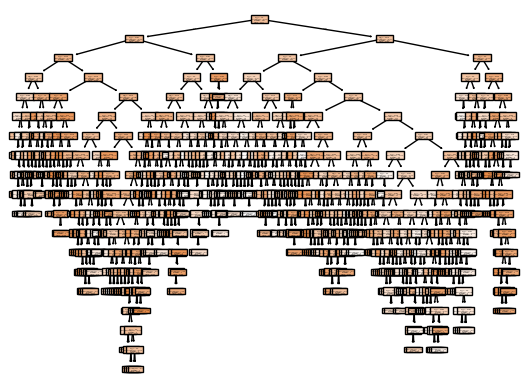

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [39]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [40]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
